In [1]:
import os,shutil
import tensorflow 
from tensorflow import keras
from tensorflow.keras import initializers, layers
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras import metrics
from pathlib import Path
import sklearn.metrics
import numpy as np
import pandas as pd
import cv2

import seaborn as sns

In [2]:
#for reproducible results
seed_value=42
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
#defining function for resizing and loading images
IMAGE_SIZE = 224
def read_image(filepath):
    return cv2.imread(filepath,0) 
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [4]:
def to_rgb(img):
    
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [5]:


# disease_types=[ 'Normal','COVID',]
# data_dir = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset'
# train_dir = os.path.join(data_dir)



In [6]:
# train_dir

In [7]:
# ###previous x-ray data

# #Converting data into tabular form with file names in the rows
# train_data = []
# for defects_id, sp in enumerate(disease_types):
#     for file in os.listdir(os.path.join(train_dir, sp)):
#         train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
# train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
# train.head()



In [8]:
# train['Disease Type'].value_counts()

In [9]:
train_data=[]
li=os.listdir('../input/x-ray-covid-final/X_Ray_covid_final/Covid')
for file in li:
 train_data.append(['{}/{}'.format('../input/x-ray-covid-final/X_Ray_covid_final/Covid', file), 1, 'Covid'])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
1,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
2,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
3,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
4,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid


In [10]:
# #previous data operation
# trainc=train[:3615]
# traind=train[3616:]
# print(trainc.shape)
# print(traind.shape)

In [11]:
# trainc['Disease Type']

In [12]:
# train['Disease Type'].value_counts()

In [13]:
# train=[trainc[:1252],traind.query('DiseaseID==1')[:1229]]
# train=pd.concat(train)

In [14]:
# train['Disease Type'].value_counts()

In [15]:
train_data = []
for defects_id, sp in enumerate(['Non-Covid']):
    li=os.listdir(os.path.join('../input/x-ray-covid-final/X_Ray_covid_final/', 'Normal'))
    
    for file in li:
        train_data.append(['{}/{}'.format('../input/x-ray-covid-final/X_Ray_covid_final/Normal', file), defects_id, 'Normal'])
        
train_c = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train_c.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
1,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
2,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
3,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
4,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal


In [16]:
train_c.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
1,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
2,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
3,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
4,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal


In [17]:
train_c.shape

(145, 3)

In [18]:
train_data = []
for defects_id, sp in enumerate(['Non-Covid']):
    li=os.listdir(os.path.join('../input/x-ray-covid-final/X_Ray_covid_final/', 'Viral Pneumonia'))
    
    for file in li:
        train_data.append(['{}/{}'.format('../input/x-ray-covid-final/X_Ray_covid_final/Viral Pneumonia', file), defects_id, 'Viral Pneumonia'])
        
train_d = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train_d.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
1,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
2,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
3,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
4,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia


In [19]:
train_d.shape

(145, 3)

In [20]:
train_d.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
1,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
2,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
3,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
4,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia


In [21]:
train=pd.concat([train,train_c,train_d],ignore_index=True)

In [22]:
train=train.sample(frac=1)
train=train.reset_index()
train=train.drop(columns=['index'],axis=0)
train.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
1,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
2,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
3,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
4,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid


In [23]:
train['Disease Type'].value_counts()

Covid              285
Normal             145
Viral Pneumonia    145
Name: Disease Type, dtype: int64

In [24]:
#storing images in array form and converting them 3 channel from 1 channel
X_train=np.zeros((train.shape[0],IMAGE_SIZE,IMAGE_SIZE))
rgb_list=[]
Y_train=[]

for i in range(train.shape[0]):
    file=train['File'][i]
    image=read_image(file)
    if image is not None:
        X_train[i]=resize_image(image,(IMAGE_SIZE,IMAGE_SIZE))
        
        
        rgb = to_rgb(X_train[i])
        
        rgb_list.append(rgb/255.0)
        Y_train.append(train['DiseaseID'][i])
        
rgb_arr = np.stack([rgb_list],axis=4)
rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
X_train=rgb_arr_to_3d        

In [25]:
# storing output labels in tabular form
Y_train=train['DiseaseID'].values
print(Y_train.shape)
print(Y_train.shape)
print(np.unique(Y_train, return_counts=True))
Y_train = to_categorical(Y_train, num_classes=2)

print(Y_train.shape)

(575,)
(575,)
(array([0, 1]), array([290, 285]))
(575, 2)


In [26]:
Y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [27]:


X_train.shape



(575, 224, 224, 3)

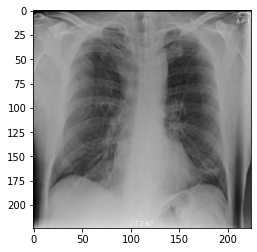

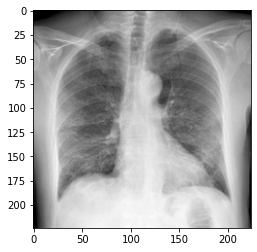

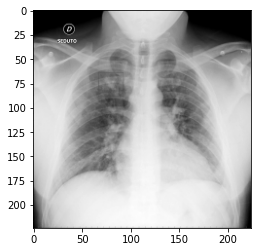

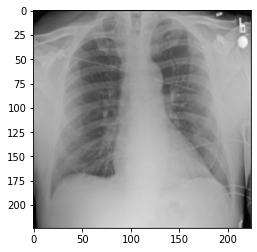

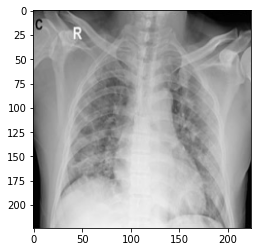

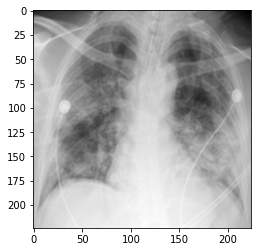

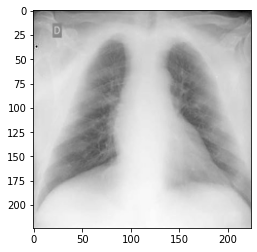

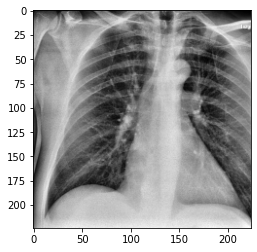

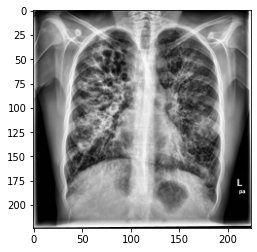

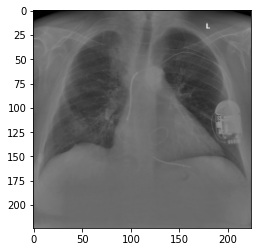

In [28]:
#Training data set examples
for i in range(10):
    plt.imshow(array_to_img(X_train[i]))
    #name="train_image"+str(i)+".png"
    #save_img("./train_resnet50/"+name,array_to_img(X_train[i]))
    plt.show()

In [29]:
#train test split of the data
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,stratify=Y_train, test_size=0.1)

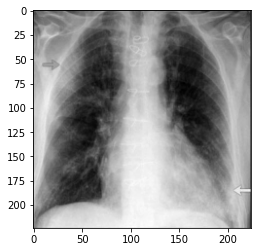

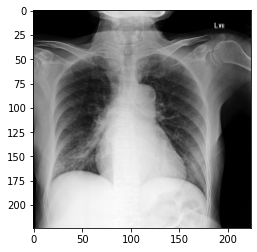

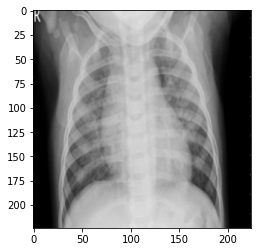

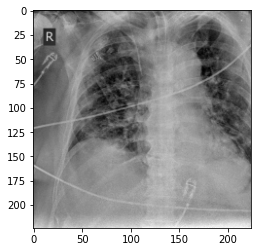

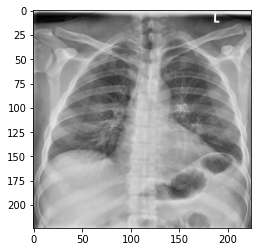

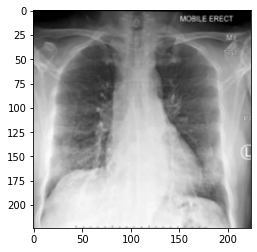

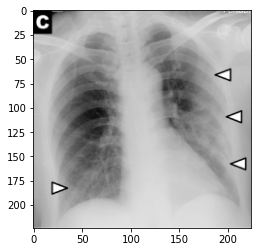

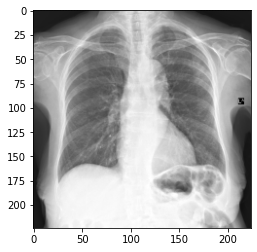

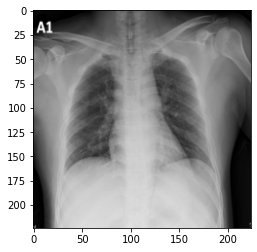

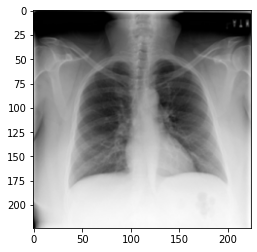

In [30]:
#Testing dataset examples
for i in range(10):
    plt.imshow(array_to_img(X_val[i]))
    #name="test_image"+str(i)+".png"
    #save_img("./test_resnet50/"+name,array_to_img(X_val[i]))
    plt.show()

In [31]:
# previous operation

# train=[trainc[:1252],traind[:1229]]
# train=pd.concat(train)



In [32]:
train['Disease Type'].value_counts()

Covid              285
Normal             145
Viral Pneumonia    145
Name: Disease Type, dtype: int64

In [33]:
# from sklearn.model_selection import train_test_split
# train,test =train_test_split(train,test_size=0.1,stratify=train['DiseaseID'])


In [34]:
# Y_train=[]
# rgb_list=[]
# X_train=np.zeros([train.shape[0],224,224,1])
# xx=0
# for i in train.index:
#     image=read_image(train_dir+'/'+train['File'][i])
#     if image is not None:
#         image=resize_image(image,(224,224))
#         image=image.reshape(224,224,1)
#         rgb_list.append(image)

#         Y_train.append(train['DiseaseID'][i])   

In [35]:
# rgb_arr = np.stack([rgb_list],axis=4)
# rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
# X_train=rgb_arr_to_3d     
# X_train.shape

In [36]:
# X_train=X_train/255.0


In [37]:
#X_val=X_val/255.0
Y_val=np.array(Y_val)

In [38]:
Y_train=np.array(Y_train)

In [39]:
train.shape

(575, 3)

In [40]:
# Y_test=[]
# rgb_list=[]
# X_test=np.zeros([test.shape[0],224,224,1])
# xx=0
# for i in test.index:
#  image=read_image(train_dir+'/'+test['File'][i])
#  if image is not None:
#         image=resize_image(image,(224,224))
#         image=image.reshape(224,224,1)
#         rgb_list.append(image)
        
#         Y_test.append(test['DiseaseID'][i])   
      
       
    
# rgb_arr = np.stack([rgb_list],axis=4)
# rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
# X_test=rgb_arr_to_3d     
# X_test.shape

In [41]:
# X_test=X_test/255.0

In [42]:
# Y_test=np.array(Y_test)

In [43]:
# Y_test.shape

In [44]:
Y_val

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32

In [45]:
###Capsule layer implementation#####3
# the squashing function.
"""
The non-linear activation used in Capsule. It drives the length of a large vector to near 1 and small vector to 0
:param vectors: some vectors to be squashed, N-dim tensor
:param axis: the axis to squash
:return: a Tensor with same shape as input vectors
"""
def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm) / (0.5 + s_squared_norm)
    return scale * x

# define our own softmax function instead of K.softmax
# because K.softmax can not specify axis.
def softmax(x, axis=-1):
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex / K.sum(ex, axis=axis, keepdims=True)
def margin_loss(y_true, y_pred):
    lamb, margin = 0.5, 0.1 #default lambda 0.5 - but test with lambda with 0.9 - 0.1
    y_pred=K.flatten(y_pred)
    y_true=K.flatten(y_true)
    return K.mean(y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (1 - y_true) * K.square(K.relu(y_pred - margin)), axis=-1)

def caps_batch_dot(x, y):
    x = K.expand_dims(x, 2)
    if K.int_shape(x)[3] is not None:
        y = K.permute_dimensions(y, (0, 1, 3, 2))
    o = tensorflow.matmul(x, y)
    return K.squeeze(o, 2)

class Capsule(Layer):
    """
    The capsule layer. It is similar to Dense layer. Dense layer has `in_num` inputs, each is a scalar, the output of the 
    neuron from the former layer, and it has `out_num` output neurons. CapsuleLayer just expand the output of the neuron
    from scalar to vector. So its input shape = [None, input_num_capsule, input_dim_capsule] and output shape = \
    [None, num_capsule, dim_capsule]. For Dense Layer, input_dim_capsule = dim_capsule = 1.
    
    :param num_capsule: number of capsules in this layer
    :param dim_capsule: dimension of the output vectors of the capsules in this layer
    :param routings: number of iterations for the routing algorithm
    """
    def __init__(self,
                 num_capsule,
                 dim_capsule,
                 routings=3,
                 share_weights=True,
                 activation='squash',
                 **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights
        if activation == 'squash':
            self.activation = squash
        else:
            self.activation = activations.get(activation)

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(1, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)
        else:
            if input_shape[-2] is None:
                raise ValueError("Input Shape must be defied if weights not shared.")
            input_num_capsule = input_shape[-2]
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(input_num_capsule, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)

    def call(self, inputs):
        """Following the routing algorithm from Hinton's paper,
        but replace b = b + <u,v> with b = <u,v>.
        This change can improve the feature representation of Capsule.
        However, you can replace
            b = K.batch_dot(outputs, hat_inputs, [2, 3])
        with
            b += K.batch_dot(outputs, hat_inputs, [2, 3])
        to realize a standard routing.
        """

        if self.share_weights:
            hat_inputs = K.conv1d(inputs, self.kernel)
        else:
            hat_inputs = K.local_conv1d(inputs, self.kernel, [1], [1])

        batch_size = K.shape(inputs)[0]
        input_num_capsule = K.shape(inputs)[1]
        hat_inputs = K.reshape(hat_inputs,
                               (batch_size, input_num_capsule,
                                self.num_capsule, self.dim_capsule))
        hat_inputs = K.permute_dimensions(hat_inputs, (0, 2, 1, 3))

        b = K.zeros_like(hat_inputs[:, :, :, 0])

        
        # Begin: Routing algorithm ---------------------------------------------------------------------#
        # The prior for coupling coefficient, initialized as zeros.
        # b.shape = [None, self.num_capsule, self.input_num_capsule].

        for i in range(self.routings):
            c = softmax(b, 1)
            o = self.activation(caps_batch_dot(c, hat_inputs))
            if i < self.routings - 1:
                b = caps_batch_dot(o, hat_inputs)
                if K.backend() == 'theano':
                    o = K.sum(o, axis=1)
        # End: Routing algorithm -----------------------------------------------------------------------#
        return o

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)
        
    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings
        }
        base_config = super(Capsule, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [46]:
class ChannelAttention(tf.keras.layers.Layer):
      def __init__(self, filters, ratio):
        super(ChannelAttention, self).__init__()
        self.filters = filters
        self.ratio = ratio

        def build(self, input_shape):
            self.shared_layer_one = tf.keras.layers.Dense(self.filters//self.ratio,
                             activation='relu', kernel_initializer='he_normal', 
                              use_bias=True, 
                              bias_initializer='zeros')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

        def call(self, inputs):
            # AvgPool
            avg_pool = tf.keras.layers.GlobalAveragePooling2D()(inputs)
            

            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
            max_pool = tf.keras.layers.GlobalMaxPooling2D()(inputs)
            max_pool = tf.keras.layers.Reshape((1,1,filters))(max_pool)

            max_pool = shared_layer_one(max_pool)
            max_pool = shared_layer_two(max_pool)


            attention = tf.keras.layers.Add()([avg_pool,max_pool])
            attention = tf.keras.layers.Activation('sigmoid')(attention)
            
            return tf.keras.layers.Multiply()([inputs, attention])

In [47]:
class SpatialAttention(tf.keras.layers.Layer):
      def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        
        def build(self, input_shape):
            self.conv2d = tf.keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

        def call(self, inputs):
            
            # AvgPool
            avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
            max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)


            return tf.keras.layers.multiply([inputs, attention]) 

In [48]:
#Y_train = to_categorical(Y_train, num_classes=2)
#Y_val = to_categorical(Y_val, num_classes=2)

In [49]:
Y_train.shape

(517, 2)

In [58]:
inputt=Input(shape=(224,224,3))
output = Conv2D(64,(3, 3), activation='relu',padding='valid')(inputt)

output = Conv2D(64,(3, 3), activation='relu',padding='same')(output)


output = Conv2D(64,(3, 3), activation='relu',padding='same')(output)

output=ChannelAttention(64, 8)(output)
output=SpatialAttention(7)(output)


output = Conv2D(128,(3, 3), activation='relu',padding='same')(inputt)

output = Conv2D(128,(3, 3), activation='relu',padding='same')(output)


output = Conv2D(128,(3, 3), activation='relu',padding='same')(output)

output=ChannelAttention(128, 8)(output)
output=SpatialAttention(10)(output)
output = Conv2D(256,(3, 3), activation='relu',padding='same')(output)

output = Conv2D(256,(3, 3), activation='relu',padding='same')(output)


output = Conv2D(256,(3, 3), activation='relu',padding='same')(output)
output=ChannelAttention(256, 8)(output)
output=SpatialAttention(7)(output)

#output = Conv2D(256,(3, 3), activation='relu',padding='same')(output)

x = Reshape((-1,256))(output)
#x = Capsule(4,16, 3, True)(x)  
x = Capsule(4, 16, 3, True)(x)
x = Capsule(4, 16, 3, True)(x)
capsule=Capsule(2,16,3,True)(x)
#capsule=Capsule(2,16,2,True)(capsule)
outputt = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule)
model = Model(inputs=inputt, outputs=outputt)

ResCapsnet_Binarymodel = Model(inputt, outputs=outputt)

In [54]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 224, 224, 128)     3584      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 224, 224, 128)     147584    
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 224, 224, 128)     147584    
_________________________________________________________________
channel_attention_10 (Channe (None, 224, 224, 128)     0         
_________________________________________________________________
spatial_attention_10 (Spatia (None, 224, 224, 128)     0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 256)     295168

In [59]:
opt= Adam()
ResCapsnet_Binarymodel.compile(
    optimizer=opt,
    loss=margin_loss,
    metrics=['accuracy'],
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


ResCapsnet_Binarymodel.summary()
es =  ModelCheckpoint(monitor='val_accuracy', mode='max', filepath='./model.h5',save_weights_only=True,save_best_only=True  )
es1 =  ModelCheckpoint(monitor='val_loss', mode='min', filepath='./model_loss.h5',save_weights_only=True,save_best_only=True  )

history=ResCapsnet_Binarymodel.fit(X_train,Y_train ,epochs=100,validation_split=0.10, batch_size=32, callbacks=[es,es1])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 224, 224, 128)     3584      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 128)     147584    
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 224, 224, 128)     147584    
_________________________________________________________________
channel_attention_13 (Channe (None, 224, 224, 128)     0         
_________________________________________________________________
spatial_attention_13 (Spatia (None, 224, 224, 128)     0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 224, 224, 256)     2951

In [63]:
Y_train.argmax(axis=-1)

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [64]:
Y_val.argmax(axis=-1)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [61]:
ResCapsnet_Binarymodel.load_weights('./model_loss.h5')
pred = ResCapsnet_Binarymodel.predict(X_val)
ResCapsnet_Binarymodel.evaluate(X_val,Y_val)

2/2 [==============================] - 1s 313ms/step - loss: 0.0032 - accuracy: 0.9828


[0.0032213812228292227, 0.982758641242981]

In [ ]:
Y_val.argmax(axis=-1)

In [ ]:
pred.argmax(axis=-1)


In [62]:
ResCapsnet_Binarymodel.load_weights('./model_loss.h5')
pred = ResCapsnet_Binarymodel.predict(X_val)
ResCapsnet_Binarymodel.evaluate(X_val,Y_val)

2/2 [==============================] - 1s 311ms/step - loss: 0.0032 - accuracy: 0.9828


[0.0032213812228292227, 0.982758641242981]

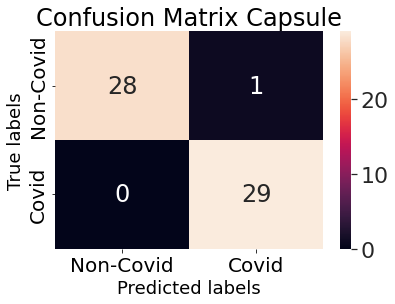

In [65]:
confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1), ResCapsnet_Binarymodel.predict(X_val).argmax(axis=1))
ax= plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'size':'18'});ax.set_ylabel('True labels',fontdict={'size':'18'}); 
ax.set_title('Confusion Matrix Capsule',fontdict={'size':'24'}); 
ax.tick_params(axis='both', which='major', labelsize=20)
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);


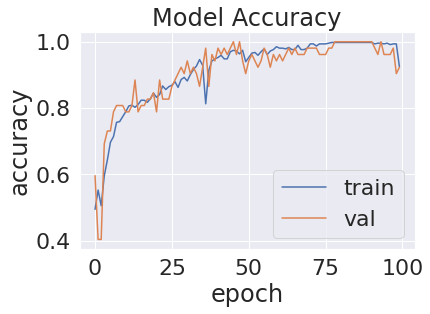

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

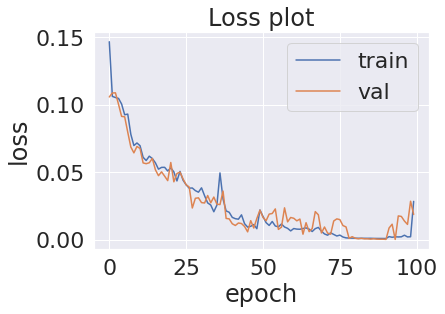

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [68]:
sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),ResCapsnet_Binarymodel.predict(X_val).argmax(axis=1))

0.9827586206896551

In [69]:
extracted_features=X_train.reshape(X_train.shape[0],-1)
extracted_features.shape

(517, 150528)

In [71]:
extracted_features_test=X_val.reshape(X_val.shape[0],-1)
extracted_features_test.shape

(58, 150528)

In [73]:
from sklearn.ensemble import RandomForestClassifier as RF
RF_model=RF(n_estimators=51,random_state=42)
RF_model.fit(extracted_features,Y_train.argmax(axis=1))[:1]
RF_predictions=RF_model.predict_proba(extracted_features_test)
print("Accuracy= ",sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),RF_model.predict(extracted_features_test)))

Accuracy=  0.7931034482758621


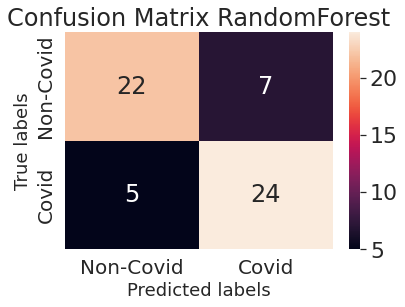

In [75]:
confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1),RF_model.predict(extracted_features_test))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'size':'18'});ax.set_ylabel('True labels',fontdict={'size':'18'}); 
ax.set_title('Confusion Matrix RandomForest',fontdict={'size':'24'}); 
ax.tick_params(axis='both', which='major', labelsize=20)
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);


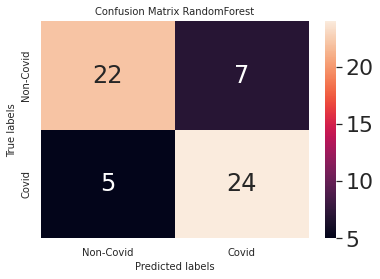

In [76]:
confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1),RF_model.predict(extracted_features_test))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'size':'10'});ax.set_ylabel('True labels',fontdict={'size':'10'}); 
ax.set_title('Confusion Matrix RandomForest',fontdict={'size':'10'}); 
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);


In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), RF_model.predict(extracted_features_test), target_names=['Non-Covid','Covid']))

              precision    recall  f1-score   support

   Non-Covid       0.81      0.76      0.79        29
       Covid       0.77      0.83      0.80        29

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.79      0.79      0.79        58



In [78]:
from sklearn import svm
SVM_model=svm.SVC(kernel='linear')
SVM_model.fit(extracted_features,Y_train.argmax(axis=1))

SVC(kernel='linear')

In [79]:


SVM_predictions=SVM_model.decision_function(extracted_features_test)
t=SVM_model.predict(extracted_features_test)



In [82]:
print("Accuracy= ",sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),t))

Accuracy=  0.8620689655172413


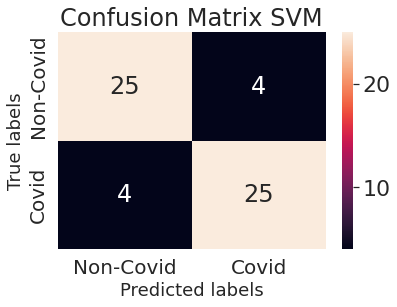

In [84]:


confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1),t)
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'size':'18'});ax.set_ylabel('True labels',fontdict={'size':'18'});
ax.set_title('Confusion Matrix SVM',fontdict={'size':'24'}); 
ax.tick_params(axis='both', which='major', labelsize=20)
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);



In [85]:


from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), t, target_names=['Non-Covid','Covid']))



              precision    recall  f1-score   support

   Non-Covid       0.86      0.86      0.86        29
       Covid       0.86      0.86      0.86        29

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [86]:


from sklearn.metrics import roc_curve


fpr_rf, tpr_rf,thresholds_RF_model= roc_curve(Y_val.argmax(axis=1), RF_predictions[:,1:])
fpr_svm, tpr_svm,thresholds_SVM_model = roc_curve(Y_val.argmax(axis=1), SVM_predictions)
fpr_capsule,tpr_capsule,thresholds_keras=roc_curve(Y_val.argmax(axis=1),pred[:,1:])




In [87]:
from sklearn.metrics import auc
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_capsule=auc(fpr_capsule,tpr_capsule)


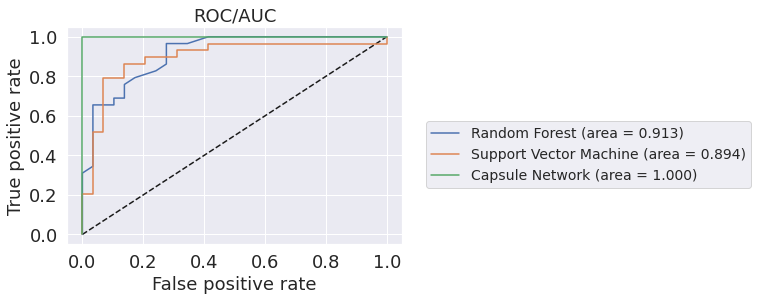

In [88]:
plt.figure(2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (area = {:.3f})'.format(auc_svm))
plt.plot(fpr_capsule, tpr_capsule, label='Capsule Network (area = {:.3f})'.format(auc_capsule))
ax.tick_params(axis='both', which='major', labelsize=1)
plt.xlabel('False positive rate',fontdict={'size':'18'})
plt.ylabel('True positive rate',fontdict={'size':'18'})
plt.title('ROC/AUC',fontdict={'size':'18'})
plt.tick_params(labelsize=18)
plt.legend(loc='best',prop={'size': '14'},bbox_to_anchor = (1.05, 0.6))
plt.show()

In [90]:


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


fpr_rf, tpr_rf,_= precision_recall_curve(Y_val.argmax(axis=1), RF_predictions[:,1:])
fpr_svm, tpr_svm,_ = precision_recall_curve(Y_val.argmax(axis=1), SVM_predictions)
fpr_capsule,tpr_capsule,_=precision_recall_curve(Y_val.argmax(axis=1),pred[:,1:])


In [91]:
from sklearn.metrics import auc
auc_rf = auc(tpr_rf,fpr_rf)
auc_svm = auc(tpr_svm,fpr_svm )
auc_capsule=auc(tpr_capsule,fpr_capsule)


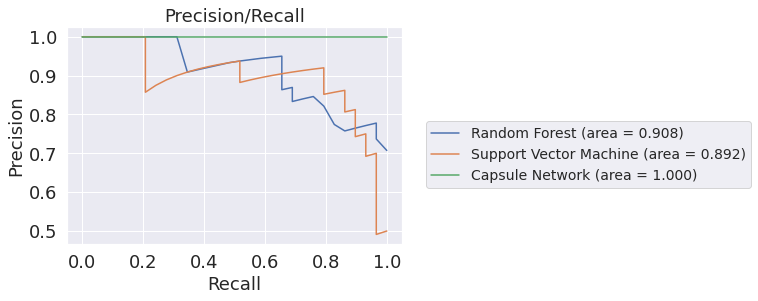

In [92]:
plt.figure(1)

plt.plot(tpr_rf,fpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.plot(tpr_svm,fpr_svm,  label='Support Vector Machine (area = {:.3f})'.format(auc_svm))
plt.plot(tpr_capsule,fpr_capsule, label='Capsule Network (area = {:.3f})'.format(auc_capsule))

plt.xlabel('Recall',fontdict={'size':'18'})
plt.ylabel('Precision',fontdict={'size':'18'})
plt.title('Precision/Recall',fontdict={'size':'18'})
plt.tick_params(labelsize=18)
plt.legend(loc='best',prop={'size': '14'},bbox_to_anchor = (1.05, 0.6))
plt.show()

In [93]:
X_train.shape

(517, 224, 224, 3)

In [94]:
Y_train.shape

(517, 2)

In [96]:
X_val.shape

(58, 224, 224, 3)

In [98]:
Y_val.shape

(58, 2)